
# No-show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions/ Insights</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The **No-show appointment** data set is a collection of a 100, 000 medical appointments in Brazil.
It aims to determine whether or not patients do show up for their medical appointments and suggest factors that may affect the patient's response.
The factors that may be used to determine why patients attend or miss their medical appointments were captured as columns of the data frames.
In this data set, we have only __1__ table, with __14__ columns. The columns are as listed below:
> #### Columns and descriptions:
- PatientId - Identification of a patient
- AppointmentID - Identification of each appointment
- Gender - Male or Female
- ScheduledDay - The day of the actual appointment, when they have to visit the doctor
- AppointmentDay - The day the appointment was registered
- Age - How old is the patient.
- Neighbourhood - Where the appointment takes place
- Scholarship - True of False
- Hipertension - True of False 
- Diabetes - True of False
- Alcoholism - True of False
- Handcap - True of False
- SMS_received - True of False
- No-show - True of False



### Question(s) for Analysis

>**By what Factors can we closely predict that a patient would attend their medical appointment?**

>**Do older people have more no_show appointments?**

>**Was scholarship a reason why patients missed their appointments?**

>**Do the gender of patients account for no-show appointments?**

In [1]:
#import required libraries and make plot inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In this section, i will inspect the dataset for missing values, duplicate rows and inconsistencies in data types. I will also observe the given rows and note those that wouldn't be needed for my analysis.

In [3]:
# Load data and print a few rows. 
# Progrmmatically inspect the data identify ussies wuth datatypes, missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# check the number of rows and columns in the dataset
df.shape

(110527, 14)

In [5]:
# check for null values in the data set
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [6]:
# check for duplicate rows in the data set
df.duplicated().any()

False

In [7]:
# inspect the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning
> I will proceed to clean the dataset and correct any descrepancies as observed during my assessment of the dataset.

#### Null values
>From the operation when we assessed the data in previous cells, we saw that there were no null values in the dataset, so it passes on that.

#### Duplicate rows
>The operation above also showed that there are no duplicate rows in the data set

#### Data types
>The dataset is has all its columns in the right data types, except those for *ScheduledDay* and *AppointmentDay*.
In the following cells, I'll convert the data type of the two columns to the appropriate *date time * columns

##### Extraneous columns
>I'll be droppping the *PatientId*, *AppointmentDay*, and the *AppointmentID* columns as they wouldn't be necessary for the analysis

#### Extraneous rows
>There is a row in the dataset where a patient's age is **-1**, this is an unrealistic data point, so I'll drop the row too

#### Column letter case
>I'll also convert the letter case of the columns in the data set to lower case and replace the hyphen with an underscore for consistency

In [8]:
# convert the data types of thetwo columns to datetime format
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [9]:
# check the data tyes of columns to confirm change
df.ScheduledDay.dtype, df.AppointmentDay.dtype

(datetime64[ns, UTC], datetime64[ns, UTC])

In [10]:
#drop the extraneous columns in the dataset
df = df.drop(['PatientId','AppointmentDay', 'AppointmentID'], axis = 1)

In [11]:
#check to confirm that 3 column shave been removed from the 14-column dataset
df.shape

(110527, 11)

In [12]:
# preview columns
df.columns

Index(['Gender', 'ScheduledDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show'],
      dtype='object')

In [13]:
# find index of row where age is less than 0
row_ind = df[df['Age'] == -1].index
row_ind

Int64Index([99832], dtype='int64')

In [14]:
# drop the row with the index gotten 
df = df.drop(row_ind, axis=0)

In [15]:
# confirm the row has been dorpped
row_ind

Int64Index([99832], dtype='int64')

In [16]:
#preview the dataset feature before proceeding
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   Gender         110526 non-null  object             
 1   ScheduledDay   110526 non-null  datetime64[ns, UTC]
 2   Age            110526 non-null  int64              
 3   Neighbourhood  110526 non-null  object             
 4   Scholarship    110526 non-null  int64              
 5   Hipertension   110526 non-null  int64              
 6   Diabetes       110526 non-null  int64              
 7   Alcoholism     110526 non-null  int64              
 8   Handcap        110526 non-null  int64              
 9   SMS_received   110526 non-null  int64              
 10  No-show        110526 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(7), object(3)
memory usage: 10.1+ MB


In [17]:
# rename the columns in the dataset to become lowercase, 
# replace the hyphen with an underscore for consistency and confirm changes
df.rename(columns= lambda x: x.strip().lower().replace('-','_'), inplace=True)
df.columns

Index(['gender', 'scheduledday', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no_show'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: By what Factors can we closely predict that a patient would attend their medical appointment?

To begin answering the question, I'll first view some descriptive statistics like the means for each column, the standard deviations, and *five-number summary* of the dataset to get an idea of what I'm about to work with.
I'll proceed to investigate how the different features correlate with the *no-show* column outcome through visual representations.
Next up, I'll plot different charts to examine the contrast between different criteria in the columns of interest and the **no-show** column outcome.



In [18]:
# inspect some statistical information of the dataset
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


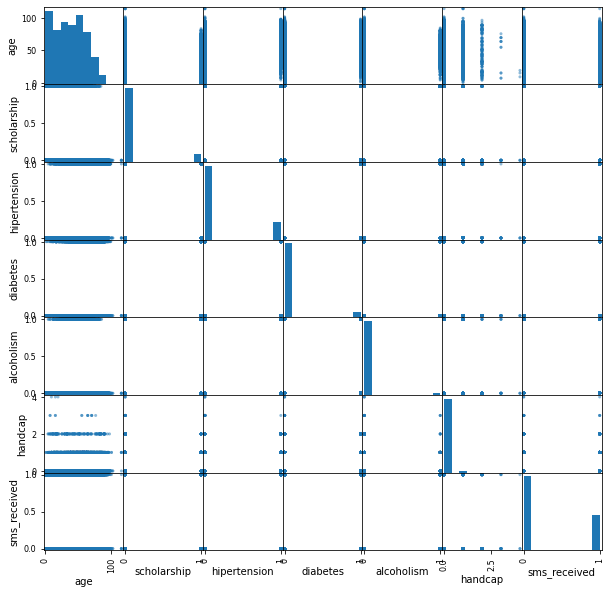

In [33]:
#plot a scatter matrix for the dataset and inspect
pd.plotting.scatter_matrix(df, figsize=(10,10));

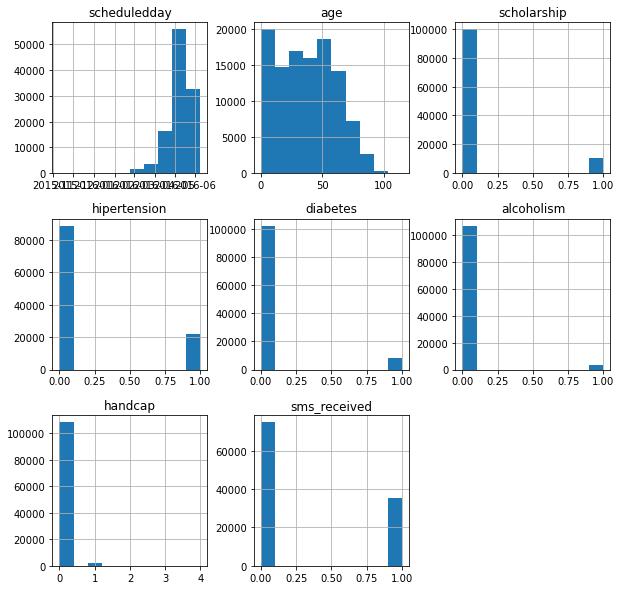

In [34]:
# plot histograms to visualise the dataset features
df.hist(figsize=(10,10));

To begin answering the question: **By what Factors can we closely predict that a patient would attend their medical appointment?** I will first categrise my data into two callable sets.
>made: made will be a variable used to find to all rows where the appointments were actually attended, ie., **no_show** for those rows reflect *No*

>missed: missed will a variable pointing to all rows where the the appointment was not attended by the patient, ie., **no_show** for those rows reflect *Yes*

In [19]:
# to obtain the rows of patients who made their appointments 
made = df.no_show == "No"

# to obtain the rows of patients who missed their appointments
missed = df.no_show == "Yes"

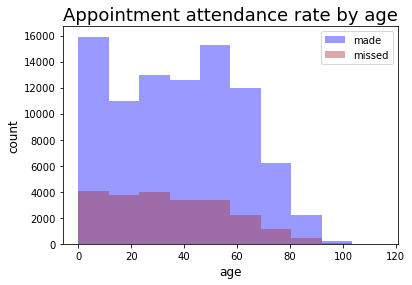

In [20]:
# plot a histogram realting the ages of patients that made the appointments
plt.hist(df.age[made], label='made', alpha=0.4, color='blue')  
plt.hist(df.age[missed], label='missed', alpha=0.4, color='brown')
plt.legend()
plt.title('Appointment attendance rate by age', fontsize=18)
plt.xlabel('age', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

From the above plot visualising the ages that made their appointments and those that missed, we can easily see that more younger patients made appoinments than the older ones, especially in the youngest age group.

>Yet the oldest poeple had the least missed appointments, as the rate of missed appointments declined with age.

>However, to ensure that it isn't just a result of larger younger population size compared to the older ones, I'll investigate to find the attendance based on proportions and see if age is really a factor responsible for younger people missing appointments.

### Question 2: Do older people have more no_show appointments?
We'll explore those who are above the *50th percentile* (or median) age to see if they have more missed appointments than younger ones

In [21]:
#find the middle age of patients
mid_age = df.age.quantile(0.5)
mid_age

37.0

In [22]:
#create a dataframe for people above and below the median age respectively
df_old = df.query('age >= {}'.format(mid_age))
df_young = df.query('age < {}'.format(mid_age))

In [23]:
# create a function to perform count operations
def counter(frame):
    return frame.count()

In [24]:
# find the count of patients in each category that made the appointment
count_old_made = counter(df_old.query('no_show == "No"').no_show)
count_young_made = counter(df_young.query('no_show == "No"').no_show)

In [25]:
# confirm that the number of made appointments by the age groups matches with the total number of made appointments
count_old_made+count_young_made == made.value_counts()[1]

True

In [26]:
#find the total count of patients in the young and old categories
total_old_count = counter(df_old.no_show)
total_young_count = counter(df_young.no_show)

In [27]:
# find the proprtion of patients in each category that made their appointments
old_proportion = count_old_made/total_old_count
young_proportion = count_young_made/total_young_count

In [28]:
# preview the proprtion of both age groups
print("young proprtion: ", young_proportion, "\nold proprtion: ", old_proportion)

young proprtion:  0.772016928347654 
old proprtion:  0.8234810432046905


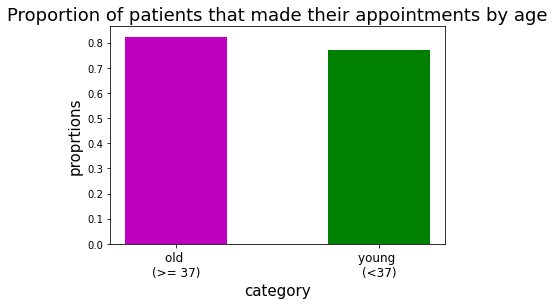

In [29]:
# visualise the attendance rate for each category by proportion
plt.bar(1, old_proportion, color = 'm', width = 0.5)
plt.bar(2, young_proportion, color = 'g', width=0.5)
plt.title('Proportion of patients that made their appointments by age', fontsize=18)
plt.ylabel('proprtions', fontsize=15)
plt.xlabel('category', fontsize=15)
plt.xticks([1,2], ['old \n(>= 37)', 'young \n(<37)'], fontsize=12)
plt.show();

From the plot above, we can see that even by proprtional attendance, it was more common for younger people to miss their medical appointments than the old.

>Next, I'll investigate if a probable reason for this outcome was because the younger ones benefited less from the scholarship

### Was scholarship a reason why patients missed their appointments?

>First, I'll compare the age groups of patients who had a scholarship and measure how much no_show appontments they had against the proportion of those without.

In [30]:
# find the patients that have scholarships and those that don't
sch = df.scholarship == True
no_sch = df.scholarship == False

In [31]:
# group by the ages of patient to obtain insight on the distribution of scholarship among them
counter(df.groupby('age')['scholarship'])

age
0      3539
1      2273
2      1618
3      1513
4      1299
       ... 
98        6
99        1
100       4
102       2
115       5
Name: scholarship, Length: 103, dtype: int64

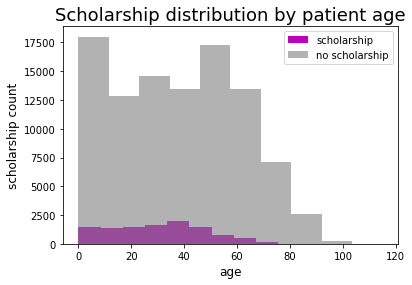

In [32]:
# make a histogram plot to visualise the distribution of scholarship among the different ages
fig, ax= plt.subplots()
ax.hist(df.age[sch], label ='scholarship', color= 'm', alpha=1)
ax.hist(df.age[no_sch], label ='no scholarship', color='grey', alpha=0.6)
ax.legend()
plt.title('Scholarship distribution by patient age', fontsize=18)
plt.xlabel('age', fontsize=12)
plt.ylabel('scholarship count', fontsize=12)
plt.show()

As we have observed above from the results of the **groupby cell** and the **histgram plot**, that the possesion of scholarships is not *normally distributed*, rather slightly skewed to the right.
>Thus, more younger people had scholarships but yet did not attend their appointments.

### Question 2: How do the days of the scheduled appointment influence patients for a missed appointment?

In this section, since the time frame of the data is not so large (3 months), I would like to see if there was any particular day that consistently had **no_show appointments**.
>To do this, I will create a column for the _day names_ extracted from the _scheduledday_ column, then obtain the count of made appointments by the week days and visualise it

In [33]:
# assess the timeframe of the dataset
df.scheduledday.unique()

<DatetimeArray>
['2016-04-29 18:38:08+00:00', '2016-04-29 16:08:27+00:00',
 '2016-04-29 16:19:04+00:00', '2016-04-29 17:29:31+00:00',
 '2016-04-29 16:07:23+00:00', '2016-04-27 08:36:51+00:00',
 '2016-04-27 15:05:12+00:00', '2016-04-27 15:39:58+00:00',
 '2016-04-29 08:02:16+00:00', '2016-04-27 12:48:25+00:00',
 ...
 '2016-06-07 07:45:16+00:00', '2016-06-07 07:38:34+00:00',
 '2016-04-27 15:15:06+00:00', '2016-05-03 07:51:47+00:00',
 '2016-05-03 08:23:40+00:00', '2016-05-03 09:15:35+00:00',
 '2016-05-03 07:27:33+00:00', '2016-04-27 16:03:52+00:00',
 '2016-04-27 15:09:23+00:00', '2016-04-27 13:30:56+00:00']
Length: 103548, dtype: datetime64[ns, UTC]

In [34]:
# extract the dayn name from the scheduledday column to create a "day" column
df['day'] = df.scheduledday.apply(lambda x: x.day_name())
df.head()

,gender,scheduledday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day
0,F,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,M,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,F,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,F,2016-04-29 17:29:31+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,F,2016-04-29 16:07:23+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [56]:
# find the count of made appointments for each week day 
day_stat = df.day[made].value_counts()
day_stat

Tuesday      20877
Wednesday    19383
Monday       18523
Friday       15028
Thursday     14373
Saturday        23
Name: day, dtype: int64

In [69]:
# set the day column to be ordered by the day of the week

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ordering = pd.api.types.CategoricalDtype(ordered =True, categories = days)
df.day = df.day.astype(ordering)


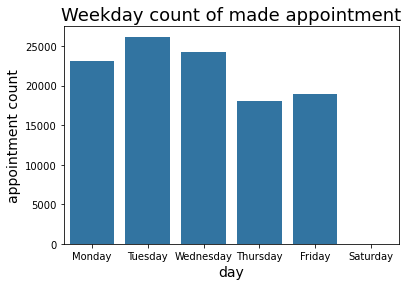

In [72]:
# plot a visual representation of the total number of appointments attended grouped by the week day

sns.countplot(data = df, x='day', color=sns.color_palette()[0])
plt.title('Weekday count of made appointment', fontsize=18)
plt.xlabel('day', fontsize=14)

plt.ylabel('appointment count', fontsize=14);

### Question 3: Do the gender of patients account for no-show appointments?
Finally, I'll investigate if gender also attributed to the patient having a **no_show** appointment
>I'll draw comparisons between the proprotions of each of the genders that made their appointments.

In [37]:
# create dataframes for each gender
df_f = df.query('gender == "F"')
df_m = df.query('gender == "M"')

In [38]:
# obtain the total number of patients in each gender group
total_female_count = counter(df_f.gender)
total_male_count = counter(df_m.gender)

# the dataset has almost twice as much females, so comparing directly with count could be misleading
total_female_count, total_male_count

(71839, 38687)

In [39]:
# confirm that the count sum matches the total from the data set
total_male_count + total_female_count == df.gender.count()

True

In [40]:
# find the number of both genders that made their appointments
female_count = df_f.gender[made].count()
male_count = df_m.gender[made].count()
female_count
male_count

30962

In [41]:
# confirm that the number of both genders matches with the total number of made appointments
female_count + male_count == made.value_counts()[1]

True

In [42]:
# obtain the proportion of each gender that made their appointments
female_proportion = female_count/total_female_count
male_proportion = male_count/total_male_count

In [43]:
# preview the proprtional data
print("female proprtion: ", female_proportion, "\nmale_proportion: ", male_proportion)

female proprtion:  0.7968512924734475 
male_proportion:  0.8003205211052808


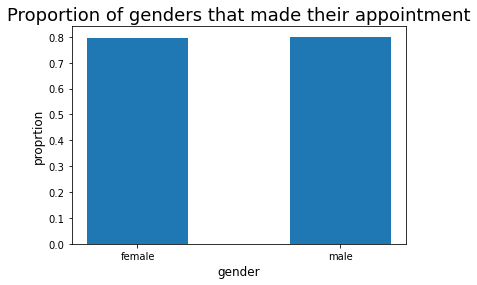

In [44]:
# create a visualisation for that data
x = [1,2]
height = [female_proportion, male_proportion]
plt.bar(x, height, width = 0.5)
plt.xticks(x, ['female', 'male'])
plt.title('Proportion of genders that made their appointment', fontsize=18)
plt.xlabel('gender', fontsize=12)
plt.ylabel('proprtion', fontsize=12)
plt.show()

<a id='conclusions'></a>
## Conclusions/ Insights

From the analysis performed on the different independent featured of the **no-show** dataset to find out factor ifluencing no-show appointments, it can be observed that the **age** of the patients had an impact on whether they made their appointments or not.
>Although this is not inferencial nor absolutely conclusive, it is tentative to suggest that the age differences among the patients was partly responsible for how they attended medical appointmnets.

>Other features analysed were the scholarship and gender. Despite younger patients having more scholarships than the older ones, they still had a poorer attendance rate in camparison. Further analysis and information about factors that may influence how scholarship holders visit medical centres would be needed for a less speculative conclusion.

>In addition, the patients gender proved to have a little influence on how they attended medicap appointments. The proportion of female and male no-show appointment were really close, showing that their gender didnt really influence attendance.

>Finally, an analysis on the days of week that recorded more attedance than others showed a staggerring fall on **Saturdays**. Overall, there seemed to be an increase in the amount of no-show appointments toward the end of the week than during the start. This is indicative that there may be other factors reponsible for patients not madking their appointment during the weekend which my analysis did not cover.

>A limitation to this analyisis is that o machine learning was used to make conclusions, thus making every conclusion tentative, also, more analysis (and/ or details) may be need to understand why younger patients have more no shwo appointments despite having scholarships.